# Mohs Hardness

Kaggle src: https://www.kaggle.com/competitions/playground-series-s3e25

In [115]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, r2_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings("ignore")


In [116]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\MohsHardness\train.csv')
df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [117]:
df.set_index('id', inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [119]:
X = df.drop(columns=['Hardness'], axis=1)
y = df['Hardness']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

GridSearch

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7284 entries, 9003 to 899
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     7284 non-null   float64
 1   density_Total          7284 non-null   float64
 2   allelectrons_Average   7284 non-null   float64
 3   val_e_Average          7284 non-null   float64
 4   atomicweight_Average   7284 non-null   float64
 5   ionenergy_Average      7284 non-null   float64
 6   el_neg_chi_Average     7284 non-null   float64
 7   R_vdw_element_Average  7284 non-null   float64
 8   R_cov_element_Average  7284 non-null   float64
 9   zaratio_Average        7284 non-null   float64
 10  density_Average        7284 non-null   float64
dtypes: float64(11)
memory usage: 682.9 KB


In [122]:
dtr = DecisionTreeRegressor(random_state=24)

pipe = Pipeline([
    ('DT', dtr),
])

params = { 
    'DT__criterion': ['absolute_error'],
    # 'DT__criterion': ['absolute_error', 'friedman_mse','squared_error', 'poisson'],
    'DT__max_depth': np.arange(5, 24, 3),
    'DT__min_samples_leaf' :  np.linspace(1, 50, 7).astype(int),
    'DT__min_samples_split':  np.linspace(2, 50, 5).astype(int),
}

kfold = KFold(n_splits=5, shuffle=True, random_state=24)

gcvr = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=kfold,
    # scoring='neg_log_loss',
    scoring='neg_mean_absolute_error',
    verbose=2,
)



In [123]:
gcvr.fit(X_train, y_train)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits


[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   1.2s
[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   1.3s
[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   1.2s
[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   1.2s
[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   1.1s
[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=14; total time=   1.2s
[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=14; total time=   1.2s
[CV] END DT__criterion=absolute_error, DT__max_depth=5, DT__min_samples_leaf=1, DT__min_samples_split=14; total time=   1.1s
[CV] 

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('DT',
                                        DecisionTreeRegressor(random_state=24))]),
             param_grid={'DT__criterion': ['absolute_error'],
                         'DT__max_depth': array([ 5,  8, 11, 14, 17, 20, 23]),
                         'DT__min_samples_leaf': array([ 1,  9, 17, 25, 33, 41, 50]),
                         'DT__min_samples_split': array([ 2, 14, 26, 38, 50])},
             scoring='neg_mean_absolute_error', verbose=2)

In [103]:
print('Best score: ', gcvr.best_score_)
print('Best parameters: ', gcvr.best_params_)

Best score:  -0.9192847941351717
Best parameters:  {'DT__criterion': 'absolute_error', 'DT__max_depth': 8, 'DT__min_samples_leaf': 9, 'DT__min_samples_split': 38}


In [104]:
best_dtr = gcvr.best_estimator_.named_steps['DT']
y_pred = best_dtr.predict(X_test) 

print(r2_score(y_test, y_pred)) 

0.3158327216305612


In [ ]:
# feature_names = X.columns

# plt.figure(figsize=(38, 25))
# plot_tree(best_dtr, feature_names=feature_names, filled=True, fontsize=20)
# plt.show()


In [106]:
df_imp = pd.DataFrame({
    'features': X.columns,
    'importance': best_dtr.feature_importances_
})


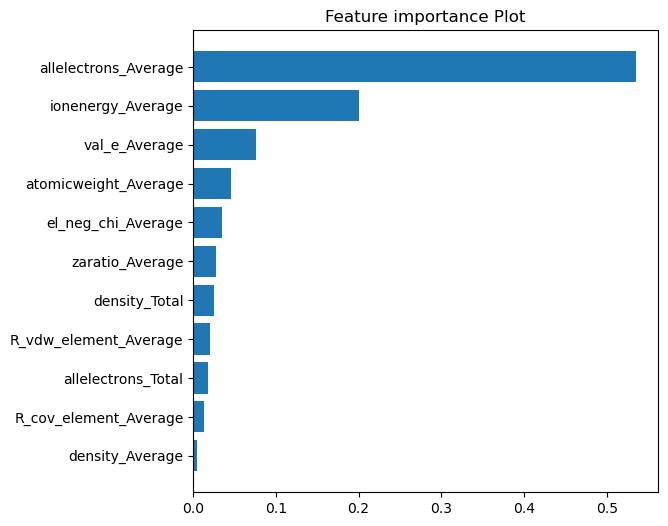

In [107]:
df_imp.sort_values('importance', inplace=True)

plt.figure(figsize=(6, 6))
plt.barh(df_imp['features'], df_imp['importance'])
plt.title('Feature importance Plot')
plt.show()

Testing

In [108]:
df_test = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\MohsHardness\test.csv')
df_test.set_index('id', inplace=True)
df_test.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
id,,,,,,,,,,,
10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [109]:
# best_dtr = gcvr.best_estimator_.named_steps['DT']
y_test_pred = best_dtr.predict(df_test)
y_test_pred

array([2.5, 2.5, 5.5, ..., 6. , 4. , 3. ])

In [110]:
df_sub = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\MohsHardness\sample_submission.csv')
df_sub.head()

,id,Hardness
0,10407,4.647
1,10408,4.647
2,10409,4.647
3,10410,4.647
4,10411,4.647


In [111]:
df_sub['Hardness'] = y_test_pred

In [112]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        6939 non-null   int64  
 1   Hardness  6939 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 108.6 KB


In [113]:
df_sub.head()

,id,Hardness
0,10407,2.5
1,10408,2.5
2,10409,5.5
3,10410,5.0
4,10411,5.5


In [114]:
df_sub.to_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\MohsHardness\submission.csv',  index=False)
